In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from holsteinlib import genSplit

In [2]:
# dataframe with data amounts per calf for 6 behaviour mapping
data_amounts_df = pd.read_csv('Datasets/SixBehaviourClassification/six_label_dataset_data_amounts.csv')

In [3]:
all_calf_ids = list(data_amounts_df.subject_id.unique())

In [4]:
separation_ratios = {'train' : 50, 'validation' : 20, 'test': 30}

# number of calves per train, validation and test data sets
train_calv_amount, valid_calv_amount, test_calv_amount = genSplit.calc_split_subject_amounts(
    len(all_calf_ids), separation_ratios)

print(train_calv_amount, valid_calv_amount, test_calv_amount)

15 6 9


## Optimal Test Calf Ids

In [5]:
%%time
test_calf_ids = genSplit.find_optimal_calf_combinations_for_split(all_calf_ids, 
                                                  test_calv_amount, 
                                                  data_amounts_df, 
                                                  test_calv_amount/train_calv_amount, 
                                                  cv=1)

CPU times: user 1h 32min 30s, sys: 3.74 s, total: 1h 32min 33s
Wall time: 1h 32min 31s


## Optimal Validation Calf Id sets

In [6]:
train_valid_calf_ids = [calf for calf in all_calf_ids if calf not in test_calf_ids]

In [7]:
%%time
valid_calf_id_sets = genSplit.find_optimal_calf_combinations_for_split(train_valid_calf_ids, 
                                                  valid_calv_amount, 
                                                  data_amounts_df, 
                                                  valid_calv_amount/train_calv_amount, 
                                                  cv=10)

CPU times: user 21 s, sys: 6 µs, total: 21 s
Wall time: 21 s


In [8]:
six_label_calf_split_info = {
    'all_calves': all_calf_ids,
    'test_calves': test_calf_ids,
    'valid_calf_id_sets': valid_calf_id_sets
}

In [9]:
with open('Datasets/SixBehaviourClassification/six_label_calf_split_info.pkl', 'wb') as f:
    pickle.dump(six_label_calf_split_info, f)

# Plots

In [10]:
test_set_data_count = data_amounts_df[data_amounts_df.subject_id.isin(test_calf_ids)].sum().drop('subject_id')
train_set_count = (data_amounts_df.sum() - test_set_data_count).drop('subject_id')

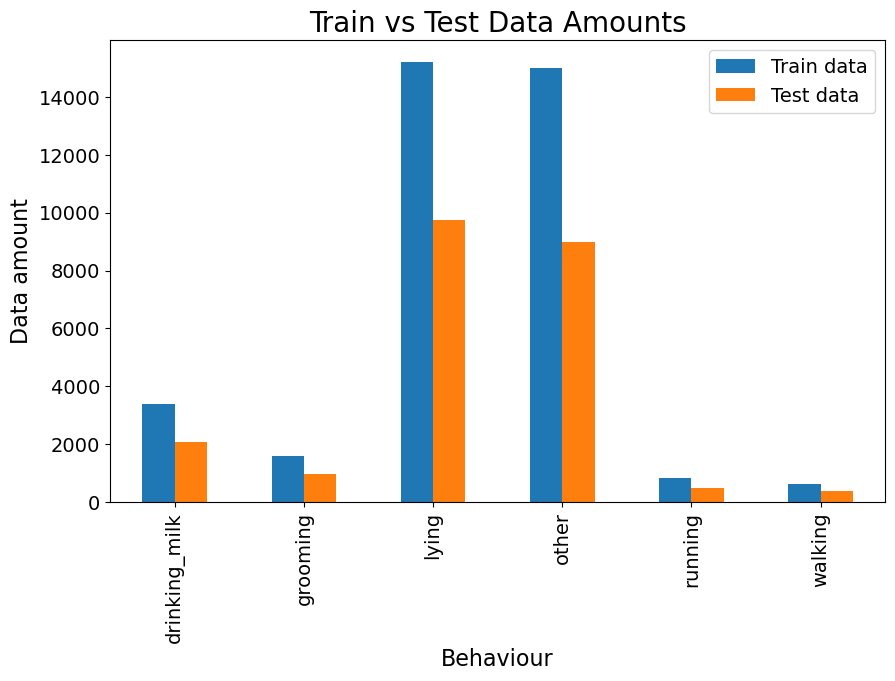

In [11]:
df = pd.DataFrame({'Train data': train_set_count, 'Test data': test_set_data_count})

ax = df.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Data amount', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Behaviour', fontsize=16)
ax.set_title('Train vs Test Data Amounts', fontsize=20)

ax.legend(fontsize=14)

# Show the plot
plt.show()

## Test:Train ratios

In [12]:
test_train_ratios = test_set_data_count/train_set_count

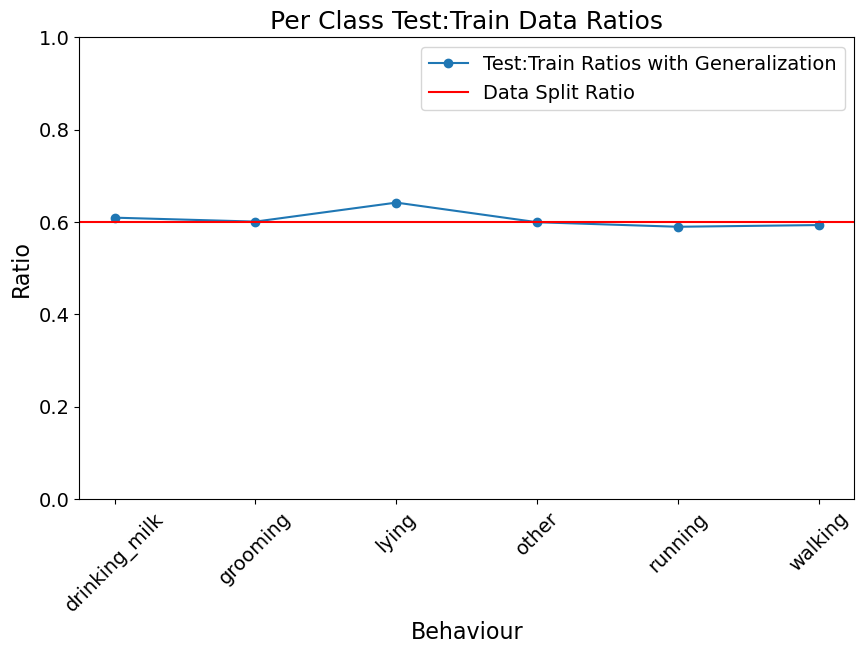

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(test_train_ratios.index, test_train_ratios.values, label='Test:Train Ratios with Generalization', marker='o')

plt.axhline(test_calv_amount/train_calv_amount, label='Data Split Ratio', color='r')

plt.xlabel('Behaviour', fontsize=16)
plt.ylabel('Ratio', fontsize=16)
plt.title('Per Class Test:Train Data Ratios', fontsize=18)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)

plt.ylim(0,1)

plt.show()